In [23]:
!pip install pandas numpy scikit-learn matplotlib seaborn xgboost



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3070, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2863, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 447, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 5

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix


In [25]:
df = pd.read_csv("/content/diabetic_data.csv")
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [26]:
np.random.seed(42)

data = {
    "Age": np.random.randint(18, 90, 1000),
    "Diagnosis": np.random.choice(["Diabetes", "Hypertension", "Cardiac"], 1000),
    "Length_of_Stay": np.random.randint(1, 15, 1000),
    "Previous_Readmissions": np.random.randint(0, 5, 1000),
    "Readmitted_Within_30_Days": np.random.choice([0, 1], 1000)
}
df = pd.DataFrame(data)
print(df.head())


   Age Diagnosis  Length_of_Stay  Previous_Readmissions  \
0   69   Cardiac               1                      0   
1   32  Diabetes              13                      1   
2   89  Diabetes               4                      1   
3   78  Diabetes              10                      3   
4   38   Cardiac               9                      3   

   Readmitted_Within_30_Days  
0                          0  
1                          0  
2                          0  
3                          0  
4                          1  


In [8]:
print(df.isnull().sum())


encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

**Data preprocessing**

In [27]:
print(df.isnull().sum())
df = df.dropna()


Age                          0
Diagnosis                    0
Length_of_Stay               0
Previous_Readmissions        0
Readmitted_Within_30_Days    0
dtype: int64


In [28]:
df = pd.get_dummies(df, columns=["Diagnosis"], drop_first=True)


Feature Target Split

In [29]:
X = df.drop('Readmitted_Within_30_Days', axis=1)
y = df['Readmitted_Within_30_Days']


Train-Test split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Model Training**

Logistic regression

In [31]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
y_proba_log = log_model.predict_proba(X_test)[:, 1]


Random Forest

In [32]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]


XGBoost

In [33]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:33:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


**Hyperparameter OPtimization**

In [34]:
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 10, 'n_estimators': 50}


Random search for XGboost

In [35]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200]
}
random_search = RandomizedSearchCV(XGBClassifier(eval_metric='logloss', random_state=42), param_dist, cv=5, n_iter=10)
random_search.fit(X_train, y_train)
print("Best Parameters:", random_search.best_params_)


Best Parameters: {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1}


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


**Model Evaluation**

In [43]:
def evaluate_model(y_test, y_pred, y_proba):
    print(classification_report(y_test, y_pred))
    print(f"ROC-AUC Score: {roc_auc_score(y_test, y_proba)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

print("\nLogistic Regression:")
evaluate_model(y_test, y_pred_log, y_proba_log)

print("\nRandom Forest:")
evaluate_model(y_test, y_pred_rf, y_proba_rf)

print("\nXGBoost:")
evaluate_model(y_test, y_pred_xgb, y_proba_xgb)

#accuracy
from sklearn.metrics import accuracy_score


Logistic Regression:
              precision    recall  f1-score   support

           0       0.56      0.63      0.60       111
           1       0.46      0.39      0.42        89

    accuracy                           0.53       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.52      0.53      0.52       200

ROC-AUC Score: 0.5115396295171576
Confusion Matrix:
[[70 41]
 [54 35]]

Random Forest:
              precision    recall  f1-score   support

           0       0.56      0.54      0.55       111
           1       0.45      0.47      0.46        89

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.51      0.51      0.51       200

ROC-AUC Score: 0.5051118534264601
Confusion Matrix:
[[60 51]
 [47 42]]

XGBoost:
              precision    recall  f1-score   support

           0       0.62      0.59      0.61       111
           1       0.52      0.55      0.54    

Visulaize result

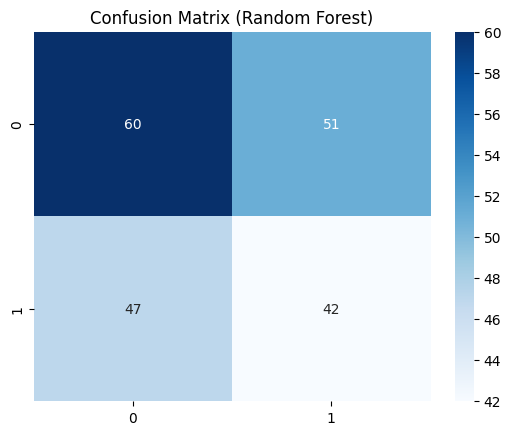

In [37]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Random Forest)")
plt.show()


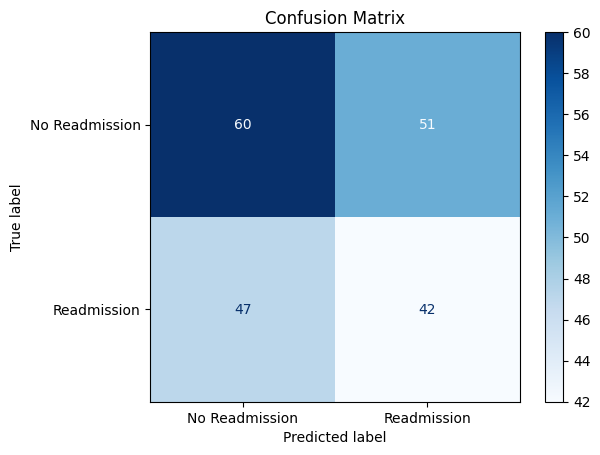

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you want to use predictions from the Random Forest model
y_pred = y_pred_rf

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Readmission", "Readmission"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

<ipython-input-42-0aef52b2adc7>:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='red', label="Random Classifier")


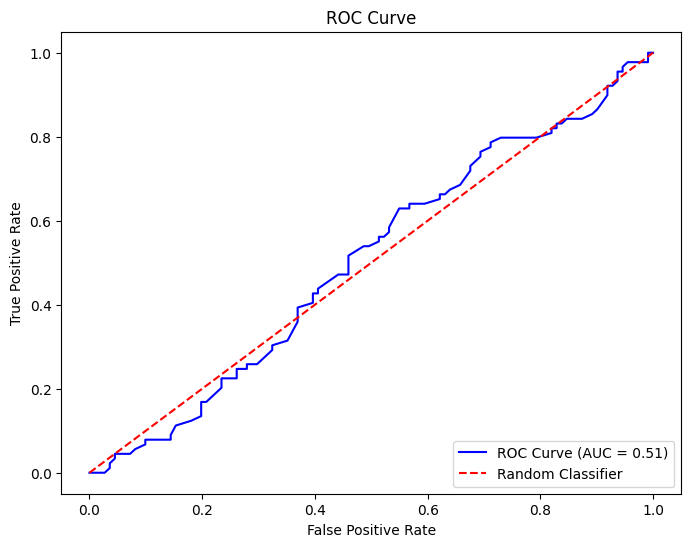

In [42]:
from sklearn.metrics import roc_auc_score, roc_curve

# Use the predicted probabilities from the Random Forest model
y_proba = y_proba_rf  # Assign y_proba_rf to y_proba

# Compute ROC-AUC score
roc_auc = roc_auc_score(y_test, y_proba)

# Generate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', color='red', label="Random Classifier")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.show()